# Aula 07 - Análise Exploratória de Dados

Conforme dicutimos na primeira aula, uma habilidade **MUITO** importante que cientistas de dados devem ter é a de **olha pros dados**, que quer dizer explorar os dados, ver do que eles se tratam, se habituar com eles.

Essa etapa é muitíssimo importante para que as etapas seguintes, em especial a de modelagem, funcionem adequadamente!

Dentro do jargão da área, essa etapa se chama **Exploratory Data Analysis** (**Análise Exploratória dos Dados**), ou simplesmente EDA. Quando dizemos "olhar pros dados", é a isso que nos referimos!

A etapa de EDA é muitíssimo importante, e deve tomar grande parte de um projeto de ciência de dados, como já discutimos, e ela comumente feita também com o auxílio de **gráficos** e outras ferramentas visuais. Faremos isso nas próximas aulas, depois que aprendermos sobre ferramentas importantíssimas de **visualização de dados** (*dataviz*).

Por hora, faremos a EDA apenas utilizando o pandas, utilizando diversos métodos e funções específicas.

Lembre-se: o objetivo é que exploremos os dados o máximo possível! 

Então, essa é a etapa em que:

- Formulamos as perguntas importantes;
- E tentamos respondê-las com base nos dados!

Vamos lá?

## Dataset Titanic

Vamos explorar o dataset do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Faremos a leitura da base, e também os primeiros passos da EDA, respondendo diversas perguntas muito interessantes.

In [3]:
import numpy as np
import pandas as pd

Vamos ler a base **de treino** baixada do kaggle, utilizando o método **pd.read_csv()**

In [4]:
df = pd.read_csv("../../dados/titanic_completa_oficial.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


Ao fazer isso, é possível notarmos que algumas colunas possuem valores preenchidos com interrogações. Entretanto, podemos cair em alguns problemas ao tentar operar com esse tipo de caractere, como abaixo.

In [5]:
df['boat'].mean()

TypeError: Could not convert 211???310?D??496B??68A55548?778D?788?469???6D83??5633???44C4?5?6?4554876??411??14?142??77?45 938?3331355?6211?744??745?101010??101?555555??D?477?55?B3?377?5533??D?337?3???4410?815D14D6?C?????855?2823??699?10??2?87?106??7?6??141411???66?5?875??????8?836?7?A??2?9?11??8?6?444?4391114735?1137????677333?63?154?6???88?85 75 7?B4D7???3?5???88?8??48 10?A?3D?8?10????11???10??1313?111113111312????1114?1412?9???13131314???????1212?14??914?1414????14?1413???12?????10?101212????16???????12???????????44?11?15?14?1499?913????4??4??10?10?????12????11?12?10?9??????1414?14121114???????10?10??????1414B??????????DD????711?139?9??12???1211?9?14?111111?12?9?44413?12???12161110?13?9?????9??16???14??10?9912?101414141010?10??9149????A16A15C???111315???????16???D????A??????????15?15?1315C?????C?D?CCCCC??15?????????C???????????13??????13???????????????16????C????12?????13???????222??12???15??1513 15 B??????????16151311?1010?10?????C?????B13????D?16????????13???15??????13????????????1613C D??C D?????????????????????15?????11?B??1615C???C???1515????C?C?????15A????D13?15????1515???15?????15???15???13??1515???A16D??????????222????10???C?13?14???6??????????????AA15???????15?1015??1513?????15?16???C?15 16?16161613?13??????????15?????16?1414?16????BCCC??1615?161616??CCCC?????CC??D13??9??13?????????D?CB1313?????A???????????????????????????????15CDD???????9?????????????????13?????????C??14???????????????????C????13131311?????11????????16??????????13??????C????9???B15??13?13 15?16???14??10??????15?CCC?1515???????????????13 15????????C????????????C????????? to numeric

Vamos preencher as interrogações com **valores nulos**; e poderemos posteriormente avaliar como os trataremos.

In [4]:
# Preenchendo as interrogações
df = df.replace({"?": np.nan})

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Também poderíamos preencher os "caracteres estranhos" diretamente com a função de leitura do arquivo; entretanto, isto pressupõe que saibamos previamente que caracteres esperar.

In [9]:
# Outra forma de preencher os "caracteres estranhos"
df = pd.read_csv("../../dados/titanic_completa_oficial.csv", na_values="?")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Pra quem estiver usando o colab:**

Pra ler arquivos do drive através do colab, temos que fazer o seguinte procedimento:

```python
from google.colab import drive
drive.mount('/content/drive')
```

Ao executar o código acima e fazer a autenticação, você poderá copiar o caminho da pasta de bases, após ela aparecer no menu à esquerda. Sugiro criar uma variável para armazenar o caminho:

```python
caminho_pasta = "/content/drive/..."
```

Depois, basta ler o arquivo desejado a partir do caminho da pasta:

```python
df = pd.read_csv(caminho_pasta + "titanic.csv")
```

### Algumas explorações que poderíamos fazer...

### 1. Familiarização com o Dataset

Vamos avaliar as primeiras 5 linhas do conjunto de dados.

In [10]:
# Primeiras 5 linhas
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
# Quantos dados existem nesse dataset?
df.shape

(1309, 14)

Nesse dataset, notamos que há 1309 registros associados a passageiros que sobreviveram, ou não, ao desastre do Titanic. Além disso, temos 13 colunas com características de cada passageiro.

In [12]:
# Quais características temos no nosso conjunto de dados?
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Temos as seguintes características no nosso conjunto de dados: ....

Visualizando informações gerais sobre as colunas:

In [12]:
# Informações sobre todas as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


É possível perceber que algumas colunas possuem um número razoável de entradas nulas. Vamos contabilizá-las abaixo.

In [13]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
# visualizando a proporção de valores nulos
(df.isnull().sum()/df.shape[0]).sort_values()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

<AxesSubplot: title={'center': 'Valores nulos por coluna'}>

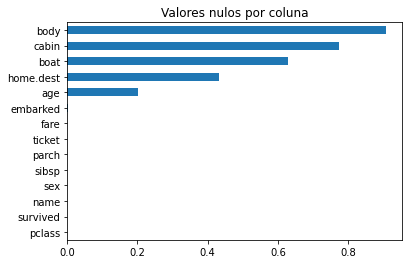

In [22]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True).plot(kind = 'barh',
                                                                   title = 'Valores nulos por coluna',
                                                                   ylabel = '')

Verificamos que há colunas com uma **grande proporção de valores nulos**, chegando a 91 % (body). Por outro lado, temos colunas com uma proporção mais moderada; particularmente, a coluna com informações sobre idade, com 20 % de entradas nulas.

O que fazer com dados missing?

### 2. Processamento dos dados

#### 2.1. Tratamento de valores nulos

In [25]:
round((df.isnull().sum()/df.shape[0]).sort_values(),2)

pclass       0.00
survived     0.00
name         0.00
sex          0.00
sibsp        0.00
parch        0.00
ticket       0.00
fare         0.00
embarked     0.00
age          0.20
home.dest    0.43
boat         0.63
cabin        0.77
body         0.91
dtype: float64

In [28]:
# Verificamos muitos tipos de valores diferentes na coluna boat
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [30]:
# Será que esta coluna traz informações úteis para inferir a sobrevivência dos passageiros?
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

Dada a alta predominância de valores nulos nas colunas "body", "cabin", e a falta de assertividade em inferir valores para as colunas "boat" e "home.dest", vamos desconsiderá-las da análise.

In [27]:
# drop de colunas que não serão utilizadas
df.drop(columns = ['body', 'cabin', 'boat', 'home.dest'], inplace = True)

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [44]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [47]:
import seaborn as sns

Vamos avaliar, agora, a distribuição dos valores na coluna de idade.

<AxesSubplot: xlabel='age', ylabel='Count'>

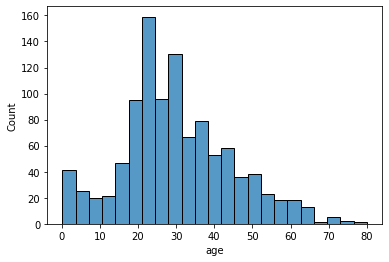

In [50]:
sns.histplot(df['age'])

In [58]:
df['age'].mean()

29.8811345124283

In [59]:
df['age'].median()

28.0

In [60]:
df['age'].mode()

0    24.0
dtype: float64

In [63]:
# Sumarizando algumas estatísticas
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

<AxesSubplot: >

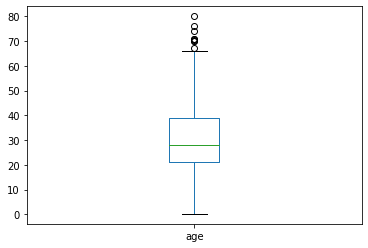

In [57]:
df['age'].plot(kind = 'box')

Podemos preencher os dados faltantes na coluna da idade com uma amostragem a partir de uma distribuição normal de mesma média e desvio-padrão que a distribuição real de idades.

In [71]:
# Vamos utilizar o gerador aleatório do numpy, a partir de uma distribuição
# normal, de mesma média e desvio-padrão que os nossos dados
import numpy as np
df['age'][df['age'].isna()] = np.random.normal(df['age'].mean(),
                                                  df['age'].std())


<ipython-input-71-d918270af8d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['age'].isna()] = np.random.normal(df['age'].mean(),


In [69]:
# Verificando que não temos mais valores nulos na coluna de idade
df['age'].isna().sum()

0

Podemos plotar a distribuição novamente, para verificar o resultado.

<AxesSubplot: xlabel='age', ylabel='Count'>

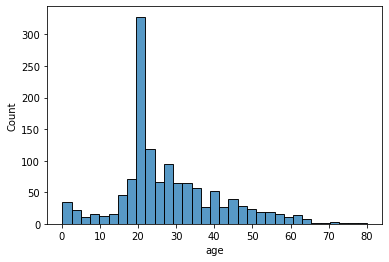

In [72]:
sns.histplot(df['age'])

Veja que nossa distribuição tem um formato que ainda se assemelha muito à original, com a particularidade de termos uma predominância maior de contagens ao redor da média, o que é esperado, já que amostramos de uma distribuição de mesma média da original.

____

#### 2.2. Temos outliers nos dados?

[Leitura complementar sobre outliers](https://medium.com/bio-data-blog/detectando-outliers-nos-modelos-17c2da304708)

Uma etapa importante em uma análise exploratória é a verificação por outliers. Como já mencionado em notebooks anteriores, estes são amostras que destoam muito do restante da distribuição. 

Existem vários critérios para determinação de outliers (ou seja, definir o que seria "destoar muito da distribuição"). Em exercícios de numpy, já trabalhamos com a implementação da metodologia que considera a distância interquartis. Aqui, trabalharemos com uma outra abordagem, que considera como outliers pontos cujo z-score (função que também já implementamos em numpy!) é maior que 3 (ponto de corte).

In [77]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [79]:
from scipy import stats
df[np.abs(stats.zscore(df.drop(columns = ['name', 'sex', 'ticket', 'embarked']))) > 3]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,C
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.000000,1,0,19877,78.8500,S
81,1,0,"Crosby, Capt. Edward Gifford",male,70.000000,1,1,WE/P 5735,71.0000,S
115,1,0,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S
...,...,...,...,...,...,...,...,...,...,...
1179,3,0,"Sage, Mr. John George",male,21.711389,1,9,CA. 2343,69.5500,S
1180,3,0,"Sage, Mrs. John (Annie Bullen)",female,21.711389,1,9,CA. 2343,69.5500,S
1210,3,0,"Skoog, Mr. Wilhelm",male,40.000000,1,4,347088,27.9000,S
1211,3,0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.000000,1,4,347088,27.9000,S


In [80]:
df.shape

(1309, 10)

Dos 1309 passageiros, há 69 deles com alguma característica como outlier.

In [81]:
#proporção de outliers
69/1309

0.052711993888464474

Vale lembrar que, na prática, avaliaremos a existência de outliers sempre **antes de outras etapas de processamento dos dados!**. Isto porque, se optarmos por excluí-los da análise, já realizaremos todas as outras etapas sem os outliers.

No nosso caso, como discutido em aula, como optamos por não excluir outliers - pela razoavelmente baixa predominância no conjunto de dados e porque entendemos que eles não necessariamente impactarão o seguimento das nossas análises, pois não faremos uso de modelos que sejam muito sensíveis a eles -, ter feito esta etapa neste momento da análise não afeta o desenvolvimento do notebook. Entretanto, **é mais recomendado que a etapa de avaliação de outliers seja uma das primeiras a ser desenvolvida em uma análise exploratória de dados**.

___

#### 2.3. Precisamos transformar as variáveis categóricas?

Vamos, agora, discutir um pouco sobre como podemos transformar dados qualitativos categóricos em medidas quantitativas, o que eventualmente será muito útil, dependendo do tipo de quantificação que queiramos fazer.

#### Encoding de variáveis categóricas

Muitas vezes, é bastante útil termos uma maneira de mapear variáveis categóricas qualitativas em variáveis categóricas numéricas. Vejamos algumas formas de fazê-lo, a seguir.

#### One-hot encoding

Uma forma muito comum de utilizar variáveis categóricas é através da criação de **variáveis mudas** (dummy variables / dummies)

<img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png" width=700>

Isso é facilmente feito com o pandas utilizando a função [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [82]:
# Quais são os nossos tipos de dados?
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

A informação acima é fundamental para diferenciarmos quais colunas contêm dados **categóricos** e quais contêm dados **numéricos**

- **Dados categóricos/qualitativos**: são dados qualitativos, quase sempre expressos na forma de **strings**. Praticamente todos os modelos não conseguem lidar com dados categóricos diretamente. Por isso, se quisermos utilizá-los, teremos que fazer algum procedimento que trasnforme os dados categórios em dados numéricos. Veremos como fazer isso mais pra frente.

- **Dados numéricos**: são dados numéricos, que podemos utilizar diretamente!

In [83]:
# Estatísticas simples de todas as colunas (variáveis numéricas)
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,28.239696,0.498854,0.385027,33.295479
std,0.837836,0.486055,13.292886,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.711389,0.000000,0.000000,7.895800
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
df["sex"]

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [16]:
# Utilizando a função "get_dummies"
pd.get_dummies(df["sex"])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [17]:
pd.get_dummies(df["sex"], drop_first = True)

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


### 3. Análise descritiva da base de dados

Verificando proporções de sobreviventes e não-sobreviventes

In [85]:
df["survived"].value_counts(normalize = True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

Temos 62 % de pessoas que não sobreviveram, e 38 % de sobreviventes.

Podemos também colocar a informação acima em forma gráfica

<AxesSubplot: >

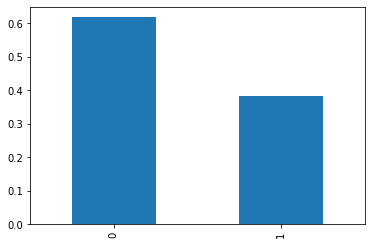

In [86]:
df["survived"].value_counts(normalize = True).plot(kind = 'bar')

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='survived', ylabel='count'>

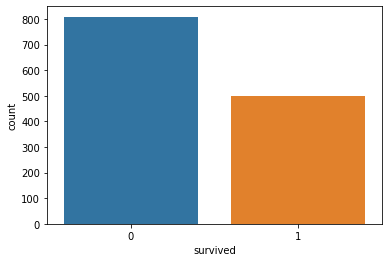

In [87]:
sns.countplot(df["survived"])

Temos, portanto, que aproximadamente 38 % do conjunto de dados é composto por sobreviventes ao desastre do Titanic (portanto, a minoria do dataset).

Podemos avaliar a quantidade de sobreviventes por algum recorte que nos pareça interessante.

In [88]:
# Número de sobreviventes por gênero
df.groupby("sex")['survived'].agg('sum')

sex
female    339
male      161
Name: survived, dtype: int64

In [89]:
# Número de sobreviventes por classe do bilhete
df.groupby("pclass")['survived'].agg('sum')

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

<AxesSubplot: xlabel='pclass'>

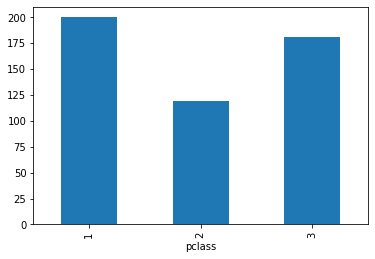

In [90]:
df.groupby("pclass")['survived'].agg('sum').plot(kind = 'bar')

Podemos, ainda, agrupar por várias colunas, o que pode nos fornecer insights interessantes.

In [91]:
df.groupby(["sex","pclass"])['survived'].agg('sum')

sex     pclass
female  1         139
        2          94
        3         106
male    1          61
        2          25
        3          75
Name: survived, dtype: int64

In [92]:
df.groupby(["sex","pclass"])['survived'].agg('sum').unstack()

pclass,1,2,3
sex,,,
female,139,94,106
male,61,25,75


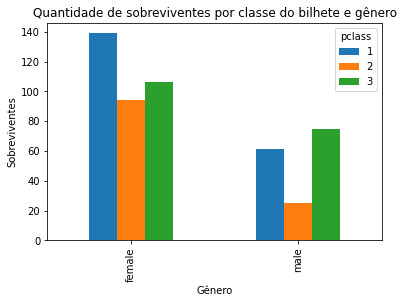

In [19]:
df.groupby(["sex","pclass"])['survived'].agg('sum').unstack().plot(kind = 'bar',
                                                                  title = 'Quantidade de sobreviventes por classe do bilhete e gênero',
                                                                  xlabel = 'Gênero',
                                                                  ylabel = 'Sobreviventes');

No geral, mulheres sobreviveram mais que homens e, em ambos os casos, a segunda classe foi a que apresentou menor taxa de sobrevivência.

Especificamente para as mulheres, notamos uma melhor sobrevivência para as passageiras de primeira classe, e que é consideravelmente maior que as restantes. Entretanto, para os homens, foram os de terceira classe que mais sobreviveram.

Será que vocês conseguiriam levantar hipóteses de por que isso aconteceu?

[pd.crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

A função **crosstab()** é muito útil quando queremos representar uma informação agregada por mais de uma coluna. É uma forma alternativa às opções já vistas até o momento.

Vamos avaliar, por exemplo, a contagem de entradas no dataset para cada tipo de embarque e classe do bilhete.

In [95]:
# síntaxe
# [coluna a agregar], [colunas a agregar]
pd.crosstab(df["embarked"], df["pclass"], margins = True)

pclass,1,2,3,All
embarked,,,,
C,141,28,101,270
Q,3,7,113,123
S,177,242,495,914
All,321,277,709,1307


Podemos mostrar a mesma informação na forma de uma matriz, colorindo os elementos de acordo com a intensidade da ocorrência na tabela.

<AxesSubplot: xlabel='pclass', ylabel='embarked'>

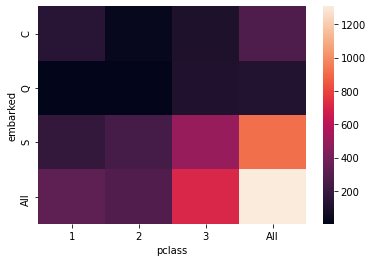

In [96]:
sns.heatmap(pd.crosstab(df["embarked"], df["pclass"], margins = True))

A mesma visualização anterior, que fizemos na forma de gráfico de barras, também poderia ser posta desta maneira.

In [21]:
pd.crosstab(index = df['sex'],
           columns = df['pclass'],
           values = df['survived'],
           aggfunc = np.mean)

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


Note que, neste caso, como especificamos que queremos valoers médios (aggfunc) da coluna de sobrevivência (values), não temos a saída padrão da função com a frequência de "ALL", como acima.

<AxesSubplot: xlabel='pclass', ylabel='sex'>

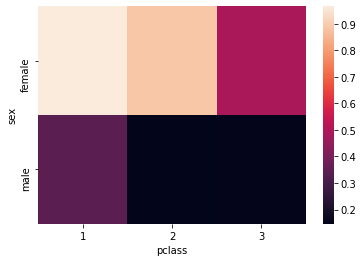

In [23]:
sns.heatmap(
pd.crosstab(index = df['sex'],
           columns = df['pclass'],
           values = df['survived'],
           aggfunc = np.mean)
)

#### Relações entre as colunas, distribuições das variáveis e relações com a sobrevivência

Uma outra exploração que poderíamos fazer consiste em tentar entender relações entre as variáveis do nosso dataset, bem como avaliar, mais especificamente, como estas estão relacionadas à sobrevivência no desastre do Titanic.

Antes de procedermos, podemos utilizar o **pairplot** do seaborn para avaliar visualmente algumas distribuições e os scatter plots entre as colunas, par a par.

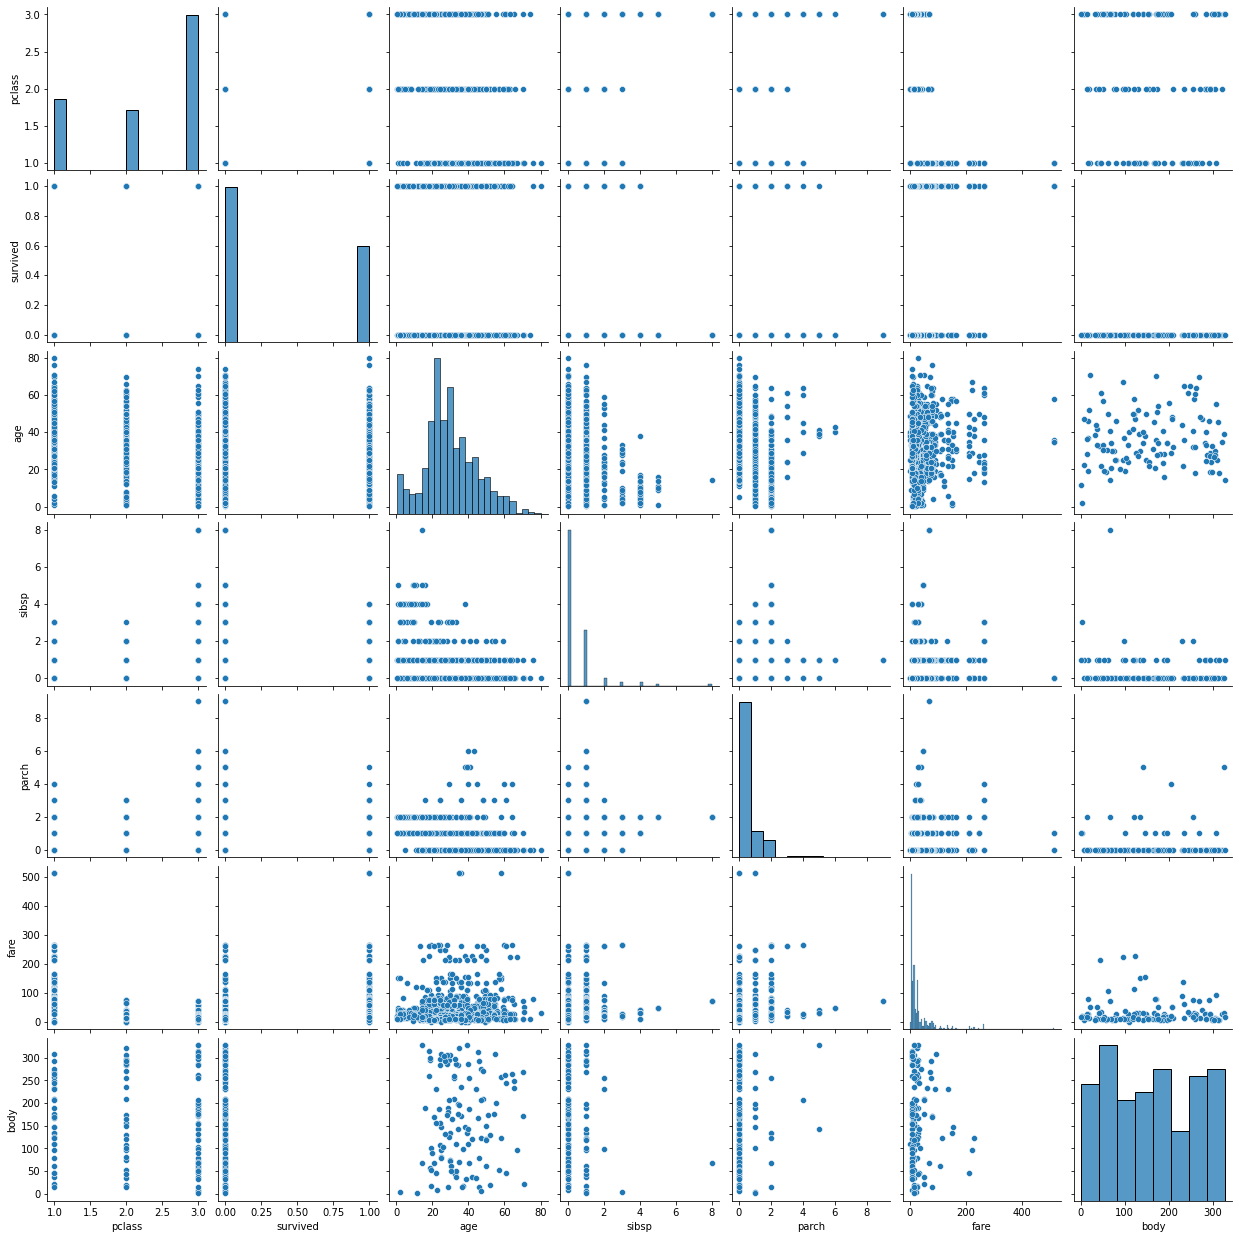

In [24]:
sns.pairplot(df)

O pairplot nos indica, na diagonal, como está a distribuição daquela característica e, nos elementos cruzados (ou seja, fora da diagonal), a relação entre as variáveis da linha e da coluna resultante nesta "matriz" da figura.

Que conclusões vocês são capazes de extrair desta visualização?

##### Correlações

**Um pouco sobre correlação e covariância**

**Covariância**
Medida estatística que mensura a **variabilidade conjunta** de duas variáveis aleatórias. Intuitivamente, podemos pensar na covariância como a tendência de valores superiores de uma variável estarem, também, associados a valores maiores da outra; e vice-versa.

*Definição matemática da covariância*
$cov(X,Y) = \sum_{i=1}^{n} \frac{(x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n-1}$

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg" alt="Alternative text" />

**Correlação**
Medida estatística de dependência entre duas variáveis. Pode ser vista sob alguns tipos de metodologias.

É muito comum encontrar a ideia de correlação associada à *correlação de Pearson*, que expressa a **dependência linear** entre duas variáveis a partir de suas **covariâncias**.

Cálculo da correlação de Pearson:

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$.

<img src="https://www.scribbr.de/wp-content/uploads/2021/08/01-correlation-types-1024x415.png" alt="Alternative text" />

A correlação de Pearson **normaliza** as covariâncias no intervalo [0,1].

Vale ressaltar que *existem outras métricas de correlação*. A correlação de Spearman, por exemplo, pode capturar relações de monotonia **não-lineares** entre duas variáveis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/1200px-Spearman_fig1.svg.png" width = 400 />

O Pandas possui uma função para avaliarmos diretamente a correlação entre as colunas do conjunto de dados:

In [28]:
df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


O resultado indica a correlação, par a par, entre as colunas do dataset (e, por isso, é simétrico em relação à diagonal principal).

Para a nossa análise, vamos lembrar que:
- Vimos que fazia sentido excluir algumas colunas (por isso ele está menor que originalmente);
- Falamos sobre enconding de variáveis categóricas, que não aparecem, por padrão, no cálculo da correlação acima.

Vamos encodá-las, como nos testes que fizemos anteriormente?

In [29]:
df2 = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

In [30]:
df2.corr()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,0.124617,0.230491,0.096335
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,-0.528693,-0.016071,-0.154558
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.063646,-0.019458,-0.075971
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.109609,-0.048678,0.075198
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,-0.213125,-0.100943,0.073258
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.185523,-0.130059,-0.172683
sex_male,0.124617,-0.528693,0.063646,-0.109609,-0.213125,-0.185523,1.000000,-0.088651,0.119504
embarked_Q,0.230491,-0.016071,-0.019458,-0.048678,-0.100943,-0.130059,-0.088651,1.000000,-0.489874
embarked_S,0.096335,-0.154558,-0.075971,0.075198,0.073258,-0.172683,0.119504,-0.489874,1.000000


Nossa matriz de correlações aumentou, porque, agora, temos como quantificar correlações com as variáveis que, antes, eram qualitativas!

Assim, como fizemos com a crosstable mais acima, podemos utilizar o heatmap do seaborn para deixar o resultado das correlações mais visual.

<AxesSubplot: >

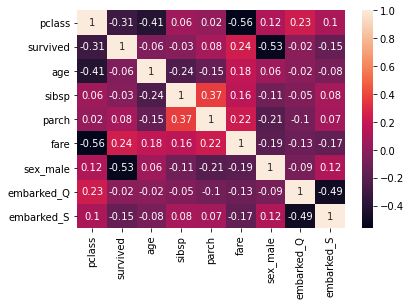

In [62]:
sns.heatmap(round(df2.corr(),2), annot = True)

Podemos refinar ainda mais a visualização: dada sua simetria em torno da diagonal principal da matriz, podemos escolher por manter apenas os elementos acima, ou abaixo, desta diagonal. Para isto, podemos criar uma **máscara** com numpy, e passá-la como argumento da matriz, conforme abaixo.

In [63]:
import numpy as np
mask = np.zeros_like(df2.corr(), dtype = np.bool) #probably could do this on df… to check
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

Temos, assim, uma matriz de booleanos indicando os elementos da matriz que serão mantidos no heatmap.

In [64]:
corr = df2.corr().mask(mask)
corr

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
survived,-0.312469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.408106,-0.055513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sibsp,0.060832,-0.027825,-0.243699,NaN,NaN,NaN,NaN,NaN,NaN
parch,0.018322,0.082660,-0.150917,0.373587,NaN,NaN,NaN,NaN,NaN
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,NaN,NaN,NaN,NaN
sex_male,0.124617,-0.528693,0.063646,-0.109609,-0.213125,-0.185523,NaN,NaN,NaN
embarked_Q,0.230491,-0.016071,-0.019458,-0.048678,-0.100943,-0.130059,-0.088651,NaN,NaN
embarked_S,0.096335,-0.154558,-0.075971,0.075198,0.073258,-0.172683,0.119504,-0.489874,NaN


Vemos, portanto, em que as posições em nossa máscara marcadas como **False** são onde teremos valores de correlação.

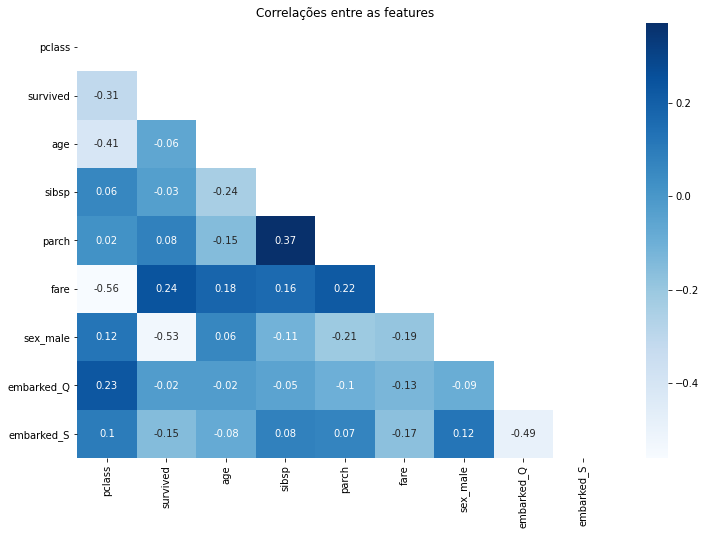

In [69]:
import matplotlib.pyplot as plt

# Podemos alterar o estilo das cores, também
plt.figure(figsize = (12,8))
sns.heatmap(round(corr,2), annot = True, cmap = 'Blues')

plt.title('Correlações entre as features');

E assim obtemos uma visualização um pouco mais simplificada e simpels de interpretar.

Vale ressaltar que o mesmo resultado pode ser obtido passando diretamente a máscara que criamos em numpy na chamda da função.

<AxesSubplot: >

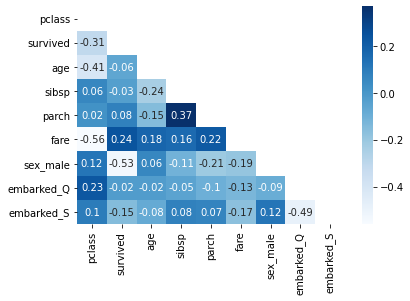

In [71]:
sns.heatmap(round(df2.corr(),2), mask = mask, annot = True, cmap = "Blues")

Vemos, assim, que: 
- A maior correlação (em valores absolutos) se dá entre "fare" e "pclass"; razoavelmente intuitivo, já que faz sentido que a classe do bilhete se associe de algum modo à tarifa paga pelo passageiro;
- A correlação de -0.41 para age e fare indica que houve uma tendência por passageiros mais jovens estarem alocados com bilhetes de classes maiores (neste caso da correlação, é a terceira classe; ou seja: no geral, as pessoas de primeira classe tendem a ser mais velhas);
- As maiores correlações com a coluna "survived" ocorrem para a classe do bilhete e "sex_male". Como ser do gênero masculino implica sex_male = 1, a correlação negativa indica tendência por maior sobrevivência de mulheres que de homens, como já verificamos anteriormente.

Especificamente em relação ao último ponto, podemos enfocar a visualização das correlações somente com a coluna de sobrevivência.

<AxesSubplot: >

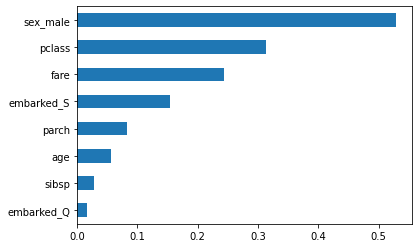

In [73]:
# Calculemos a correlação em valores absolutos (ou seja, desconsiderando o sinal) e dropemos o índice da própria coluna survived, pois a correlação será 1
abs(df2.corr()['survived'].drop(index = 'survived')).sort_values(ascending = True).plot(kind = 'barh')

Vemos, assim, as variáveis mais associadas à sobrevivência. Vemos que, no geral, houve maior tendência por sobreviverem passageiros:
- do gênero feminino;
- de classes mais elevadas de bilhete (primeira e segunda classe);
- que pagaram mais em suas tarifas;
- e que embarcaram no ponto de embarque "S". (apesar de, aqui, já termos valores mais fracos de correlação).

___

### 4. Sumarizando...

Neste notebook, enfocamos a discussão majoritariamente em abordagens de processamento e manipulação dos dados, mas também demos alguns exemplos de conclusões que poderiam ser extraídas deste dataset em uma Análise Explroatória de Dados (mas note que há várias outras análises que poderíamos fazer!).

A ideia é clarificar este procedimento e o raciocínio das principais etapas de uma EDA. O aprofundamento na análise, tipos de relações que podem ser estabelecidas, processamentos etc são todos muito dependentes da criatividade e da nossa capacidade de formular boas perguntas norteadores e hipóteses para o problema. 

Lembrem-se de que há várias abordagens possíveis em uma EDA, desde que sejamos coerentes com as hipóteses assumidas pelos modelos e operações com os quais trabalharemos!